In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visulaisation
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['rounds2.csv', 'mapping.csv', 'companies.txt']


In [7]:
#pd.read_csv method is to read the text file, 
#encoding ISO-8859-1 is the encoding style used in the text file
#Since its a text file, we have used sep as '\t'
companies = pd.read_csv('../input/companies.txt', encoding = "ISO-8859-1", sep = '\t')
#To get the first 5 observation of the dataset,it is a part of data understanding
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [8]:
#CHECKPOINT 1 ANALYSIS STARTS
# This will get your some insight about the data
# We have 66368 X 10 matrix
# We have all the rows containing object elememts, 
#so if we need to perform operation on some column we have to convert column to desired dtype 
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [9]:
#Checkpoint 1 Table 1.1 Question 3 solution, since we have only permalink column having all the rows with unique values
#This data understanding tells us below observation
#We have 27296 category of companies which receives funding
#We have 137 country and out of which we have 311 states who receives funding
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66102,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Yasssu,Karma,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [11]:
#This line is to read the round2 csv into dataframe.
rounds2 = pd.read_csv('../input/rounds2.csv', encoding='ISO-8859-1')

In [12]:
#Data understanding steps include:
#Get the insight using head() function
# Get the idea of spread of data using describe()
# Get the info about the dataframe using info()
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [13]:
#Checkpoint 1 Table 1.1 Question 1 solution
#This below query gives out the uniqueness of the data
print(len(rounds2.company_permalink.str.upper().unique()))

66370


In [14]:
#Checkpoint 1 Table 1.1 Question 2 solution
#This will give us the unique companies in companies.txt file
print(len(companies['permalink'].str.upper().unique()))

66368


In [15]:
#Checkpoint 1 Table 1.1 Question 4 solution
#Now to calculate companies which are present in rounds2 those are not present in companies
#we need to get the set difference 
unique_company_companies = pd.DataFrame(companies.permalink.str.upper().unique())
unique_company_rounds2 = pd.DataFrame(rounds2.company_permalink.str.upper().unique())
unique_company_companies.equals(unique_company_rounds2)

False

In [16]:
#Since the above analysis says that the number of unique companies are not same in two files,
#Lets see the names of the companies those are in rounds2 but not in companies
#This names confirms that rounds df has countries which are not there in companies df
set(rounds2.company_permalink.str.upper().unique()).difference(set(companies.permalink.str.upper().unique()))

{'/ORGANIZATION/E-CÃ\x8aBICA',
 '/ORGANIZATION/ENERGYSTONE-GAMES-Ç\x81ΜÇ\x9f³Æ¸¸Æ\x88\x8f',
 '/ORGANIZATION/HUIZUCHE-COM-Æ\x83\xa0Ç§ŸÈ½¦',
 '/ORGANIZATION/MAGNET-TECH-Ç£\x81Ç\x9f³Ç§\x91Æ\x8a\x80',
 '/ORGANIZATION/TIPCAT-INTERACTIVE-Æ²\x99È\x88ŸÄ¿¡Æ\x81¯Ç§\x91Æ\x9a\x80',
 '/ORGANIZATION/WEICHE-TECH-Å\x96\x82È½¦Ç§\x91Æ\x8a\x80',
 '/ORGANIZATION/ZENGAME-Ç¦\x85Æ¸¸Ç§\x91Æ\x8a\x80'}

In [17]:
#Before that lets analyse the two dataframes for null values and column importance
companies.isnull().any()

permalink        False
name              True
homepage_url      True
category_list     True
status           False
country_code      True
state_code        True
region            True
city              True
founded_at        True
dtype: bool

In [18]:
#Calculating the number of missing values in each row
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [19]:
#Since we have significant numbers of null values in few columns, lets analyse the percentage
print(round(100 *(companies.isnull().sum()/len(companies)) , 2))

permalink         0.00
name              0.00
homepage_url      7.62
category_list     4.74
status            0.00
country_code     10.48
state_code       12.88
region           12.10
city             12.10
founded_at       22.93
dtype: float64


In [20]:
#Since we have significant percentage of data missing in founded_at, state_code,city,region we can drop these columns
#Dropping of column is justified as the columns having maximum missing values are of no business relevance too.
companies.drop(['founded_at', 'city', 'state_code', 'region'], axis=1, inplace=True)

In [21]:
#Now performing the same data cleansing for rounds df
print(round(100 * (rounds2.isnull().sum()/len(rounds2)) ,2))

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64


In [22]:
#Since we have huge missing values for funding_round_code and it has no business relevance, hence dropping
rounds2.drop('funding_round_code', axis=1 , inplace=True)

In [23]:
#Since rounds2 df has company_permalink and companies df has permalink as unique column names, 
#we have to merge them on permalink
#Also making the column permalink in UPPER/LOWER case will help in clean merging
rounds2['company_permalink'] = list(map(lambda x : x.upper() , rounds2['company_permalink']))
companies['permalink'] = list(map(lambda x : x.upper(), companies['permalink']))

In [24]:
#Before merging lets rename the company_permalink column of rounds2 df to permalink
rounds2.rename(columns={'company_permalink':'permalink'}, inplace=True)

In [25]:
#Now we can merge the dataframes
master_frame = pd.merge(rounds2, companies, how = 'left', on ='permalink')
master_frame.head()

,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN


In [26]:
#CHECKPOINT 2 ANALYSIS STARTS
#This gives us the overview of the observation in master_frame
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 10 columns):
permalink                  114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
name                       114941 non-null object
homepage_url               108810 non-null object
category_list              111535 non-null object
status                     114942 non-null object
country_code               106271 non-null object
dtypes: float64(1), object(9)
memory usage: 9.6+ MB


In [27]:
#As per Table2.1 we need to only consider 4 founding_round_type in calculation
master_frame = master_frame[(master_frame['funding_round_type'] == 'venture') 
                            | (master_frame['funding_round_type'] == 'seed')
                            | (master_frame['funding_round_type'] == 'angel')
                            | (master_frame['funding_round_type'] == 'private_equity')]
master_frame.head()

,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN


In [28]:
#Converting the raised_amount_usd in millions
master_frame['raised_amount_usd'] = master_frame['raised_amount_usd']/1000000

funding_round_type
angel              0.96
private_equity    73.31
seed               0.72
venture           11.75
Name: raised_amount_usd, dtype: float64


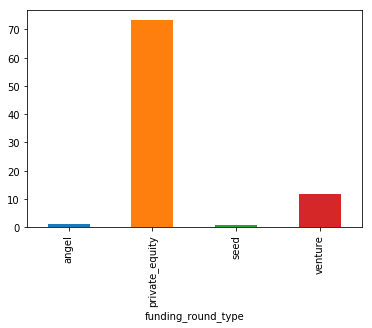

In [29]:
#Now we will group by master_frame by funding_round_type and calculate the average
print(round(master_frame.groupby(['funding_round_type']).raised_amount_usd.mean(), 2))
round(master_frame.groupby(['funding_round_type']).raised_amount_usd.mean(), 2).plot(kind='bar',x='funding_round_type',y='million_usd')

In [30]:
#As mentioned in the checkpoint we need to only consider the above received 'venture' investment type
master_frame = master_frame[(master_frame['funding_round_type'] == 'venture')]
master_frame.head()

,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.000000,#fame,http://livfame.com,Media,operating,IND
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3.406878,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2.000000,0-6.com,http://www.0-6.com,Curated Web,operating,CHN
5,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,24-07-2014,NaN,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA


In [31]:
#Analysing the master_frame
master_frame.isnull().sum(axis=0)

permalink                     0
funding_round_permalink       0
funding_round_type            0
funded_at                     0
raised_amount_usd          5266
name                          1
homepage_url               2946
category_list              1132
status                        1
country_code               2875
dtype: int64

In [32]:
#Dropping the unncessary column
master_frame = master_frame.drop(['funding_round_permalink', 'funded_at', 'homepage_url',
                                  'funded_at','status'], axis = 1)

In [33]:
#Dropping rows based on null columns
master_frame = master_frame[~(master_frame['raised_amount_usd'].isnull() | master_frame['country_code'].isnull() |
                             master_frame['category_list'].isnull())]
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47809 entries, 0 to 114941
Data columns (total 6 columns):
permalink             47809 non-null object
funding_round_type    47809 non-null object
raised_amount_usd     47809 non-null float64
name                  47809 non-null object
category_list         47809 non-null object
country_code          47809 non-null object
dtypes: float64(1), object(5)
memory usage: 2.6+ MB


In [34]:
#CHECKPOINT 3 ANALYSIS
#Creating the top9 df
top9 = master_frame.pivot_table(values='raised_amount_usd', index = 'country_code', aggfunc = 'sum').sort_values(['raised_amount_usd'], ascending = False).head(9)

              raised_amount_usd
country_code                   
USA               420068.029342
CHN                39338.918773
GBR                20072.813004
IND                14261.508718
CAN                 9482.217668
FRA                 7226.851352
ISR                 6854.350477
DEU                 6306.921981
JPN                 3167.647127


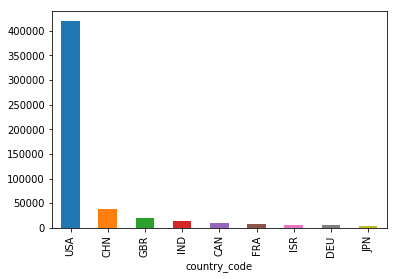

In [35]:
#Getting the list of countries, to filter out the english speaking countries
print(top9)
top9.raised_amount_usd.plot(kind='bar' , x='coutry_code', y='raised_amount_usd')
#We can hence pick up USA(United States of America) ,GBR(Great Britain/UK), IND(India) as top 3 english speaking countries to invest in
#Use the link https://en.wikipedia.org/wiki/List_of_countries_by_English-speaking_population

In [38]:
#Sector Analysis
#Read the mapping CSV
mapping = pd.read_csv('../input/mapping.csv')
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [39]:
#Reshaping the mapping dataframe to merge with the master_frame dataframe. Using melt() function to unpivot the table.
mapping = pd.melt(mapping, id_vars =['category_list'], value_vars =['Automotive & Sports',
                                                              'Cleantech / Semiconductors','Entertainment',
                                                             'Health','Manufacturing','News, Search and Messaging','Others',
                                                             'Social, Finance, Analytics, Advertising']) 

In [40]:
#Dropping the rows with value 0,
mapping = mapping[~(mapping.value == 0)]

In [41]:
#Also we do not need the value column
mapping.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687 entries, 8 to 5479
Data columns (total 3 columns):
category_list    687 non-null object
variable         687 non-null object
value            687 non-null int64
dtypes: int64(1), object(2)
memory usage: 21.5+ KB


In [42]:
#Treating the category_list of master_frame
master_frame['category_list'] = master_frame['category_list'].apply(lambda x: x.split('|')[0])

In [43]:
#Now we need to merge the master_frame and mapping
master_frame = master_frame.merge(mapping, how = 'left', on ='category_list')
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47809 entries, 0 to 47808
Data columns (total 8 columns):
permalink             47809 non-null object
funding_round_type    47809 non-null object
raised_amount_usd     47809 non-null float64
name                  47809 non-null object
category_list         47809 non-null object
country_code          47809 non-null object
variable              44692 non-null object
value                 44692 non-null float64
dtypes: float64(2), object(6)
memory usage: 3.3+ MB


In [44]:
#Renaming the column variable as main_sector
master_frame = master_frame.rename(columns={'variable':'main_sector'})

In [45]:
#List of primary sectors which have no main sectors in the master_frame
print(master_frame[master_frame.main_sector.isnull()].category_list.unique())

['Analytics' 'Finance' 'Nanotechnology' 'Finance Technology'
 'Business Analytics' 'Contact Management' 'Financial Services'
 'Career Management' 'Cloud Management' 'Big Data Analytics'
 'Document Management' 'Digital Signage' 'Journalism' 'Energy Management'
 'Waste Management' 'Alternative Medicine' 'Investment Management'
 'English-Speaking' 'Lead Management' 'IT Management' 'Event Management'
 'Navigation' 'Professional Services' 'Educational Games' 'Cannabis'
 'Innovation Management' 'Enterprise Hardware' 'Personalization'
 'Knowledge Management' 'Identity Management' 'Digital Rights Management'
 'Natural Gas Uses' 'Predictive Analytics' 'Natural Language Processing'
 'Intellectual Asset Management' 'Risk Management' 'Project Management'
 'Adaptive Equipment' 'Supply Chain Management' 'China Internet' 'Racing'
 'Specialty Retail' 'Property Management'
 'Biotechnology and Semiconductor' 'Rapidly Expanding' 'Mobile Analytics'
 'Governance' 'Product Search' 'Personal Finance' 'Fleet 

In [46]:
#Number of rows with NaN masin_sector value
len(master_frame[master_frame.main_sector.isnull()])

3117

In [47]:
#Retaining the rows which have main_sector values
master_frame = master_frame[~(master_frame.main_sector.isnull())]
len(master_frame.index)

44692

In [48]:
#Now creating the three dataframe D1, D2 and D3 for further sector analysis
D1 = master_frame[(master_frame['country_code'] == 'USA') & (master_frame.raised_amount_usd > 5.0) & (master_frame.raised_amount_usd < 15.0)]

In [49]:
#Now we need to calculate the total count of investment and total amount of investment and merge it with master_frame
D1_function = D1[['raised_amount_usd','main_sector']].groupby(['main_sector']).agg(['sum', 'count'])

In [50]:
#Merging D1 and D1_function
D1 = D1.merge(D1_function, on ='main_sector', how='left')
D1.head()

/opt/conda/lib/python3.6/site-packages/pandas/core/reshape/merge.py:544: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,main_sector,value,"(raised_amount_usd, sum)","(raised_amount_usd, count)"
0,/ORGANIZATION/128-TECHNOLOGY,venture,11.999347,128 Technology,Service Providers,USA,Others,1.0,21534.280296,2400
1,/ORGANIZATION/1366-TECHNOLOGIES,venture,5.150000,1366 Technologies,Manufacturing,USA,Manufacturing,1.0,6228.553378,691
2,/ORGANIZATION/1366-TECHNOLOGIES,venture,12.400000,1366 Technologies,Manufacturing,USA,Manufacturing,1.0,6228.553378,691
3,/ORGANIZATION/1366-TECHNOLOGIES,venture,6.000000,1366 Technologies,Manufacturing,USA,Manufacturing,1.0,6228.553378,691
4,/ORGANIZATION/170-SYSTEMS,venture,14.000000,170 Systems,Software,USA,Others,1.0,21534.280296,2400


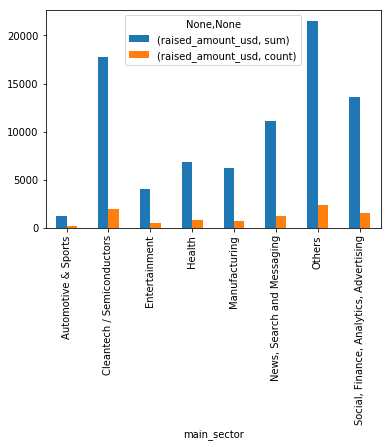

In [51]:
#Ploting the sector-wise graph for investment count and investment amount for USA
D1_function.plot(kind='bar')

In [52]:
#Similarly we can calculate D2
D2 = master_frame[(master_frame['country_code'] == 'GBR') & (master_frame.raised_amount_usd > 5.0) & (master_frame.raised_amount_usd < 15.0)]
D2_function = D2[['raised_amount_usd','main_sector']].groupby(['main_sector']).agg(['sum', 'count'])
D2 = D2.merge(D2_function, on ='main_sector', how = 'left')
D2.head()

/opt/conda/lib/python3.6/site-packages/pandas/core/reshape/merge.py:544: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,main_sector,value,"(raised_amount_usd, sum)","(raised_amount_usd, count)"
0,/ORGANIZATION/365SCORES,venture,5.500000,365Scores,Android,GBR,"Social, Finance, Analytics, Advertising",1.0,756.888357,89
1,/ORGANIZATION/7DIGITAL,venture,8.468328,7digital,Content Creators,GBR,Entertainment,1.0,401.511059,46
2,/ORGANIZATION/7DIGITAL,venture,10.000000,7digital,Content Creators,GBR,Entertainment,1.0,401.511059,46
3,/ORGANIZATION/90MIN,venture,5.800000,90min,Media,GBR,Entertainment,1.0,401.511059,46
4,/ORGANIZATION/ABCODIA,venture,8.259067,Abcodia,Biotechnology,GBR,Cleantech / Semiconductors,1.0,1096.905008,123


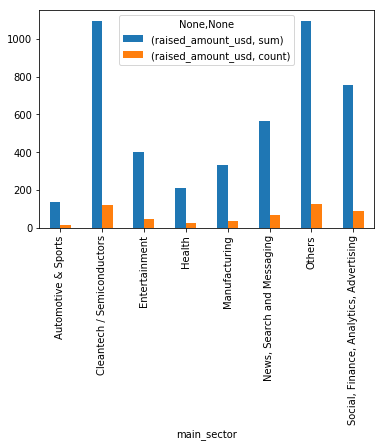

In [53]:
#Ploting the sector-wise graph for investment count and investment amount for GBR
D2_function.plot(kind='bar')

In [54]:
#Similarly we can calculate D3
D3 = master_frame[(master_frame['country_code'] == 'IND') & (master_frame.raised_amount_usd > 5.0) & (master_frame.raised_amount_usd < 15.0)]
D3_function = D3[['raised_amount_usd','main_sector']].groupby(['main_sector']).agg(['sum', 'count'])
D3 = D3.merge(D3_function, on ='main_sector', how = 'left')
D3.head()

/opt/conda/lib/python3.6/site-packages/pandas/core/reshape/merge.py:544: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,main_sector,value,"(raised_amount_usd, sum)","(raised_amount_usd, count)"
0,/ORGANIZATION/-FAME,venture,10.000000,#fame,Media,IND,Entertainment,1.0,200.830000,23
1,/ORGANIZATION/21DIAMONDS-INDIA,venture,6.369507,21Diamonds,E-Commerce,IND,Others,1.0,697.409507,77
2,/ORGANIZATION/ADLABS-IMAGICA,venture,8.180000,Adlabs Imagica,Entertainment,IND,Entertainment,1.0,200.830000,23
3,/ORGANIZATION/AMAGI-MEDIA-LABS,venture,5.500000,Amagi Media Labs,Advertising,IND,"Social, Finance, Analytics, Advertising",1.0,215.543500,25
4,/ORGANIZATION/APALYA,venture,7.500000,Apalya,Content,IND,Entertainment,1.0,200.830000,23


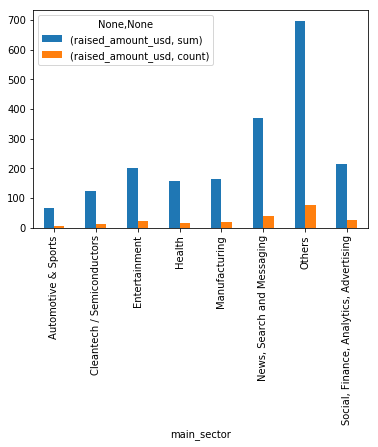

In [55]:
#Ploting the sector-wise graph for investment count and investment amount for IND
D3_function.plot(kind='bar')

In [56]:
#Now calculating the answers for table 5.1 in excel sheet
print(D1.raised_amount_usd.count())
print(D2.raised_amount_usd.count())
print(D3.raised_amount_usd.count())

9227
524
222


In [57]:
#Total amount of investment (USD)
print(round(D1.raised_amount_usd.sum(), 2))
print(round(D2.raised_amount_usd.sum(), 2))
print(round(D3.raised_amount_usd.sum(), 2))

82391.52
4593.7
1998.54


In [58]:
#Maximun number of investment per sector
D1_function.head(8)

raised_amount_usd      
                                                      sum count
main_sector                                                    
Automotive & Sports                           1269.104361   142
Cleantech / Semiconductors                   17796.003033  1950
Entertainment                                 4040.212982   470
Health                                        6855.859357   759
Manufacturing                                 6228.553378   691
News, Search and Messaging                   11076.816094  1265
Others                                       21534.280296  2400
Social, Finance, Analytics, Advertising      13590.695048  1550

In [59]:
D2_function.head(8)

raised_amount_usd      
                                                      sum count
main_sector                                                    
Automotive & Sports                            137.051565    14
Cleantech / Semiconductors                    1096.905008   123
Entertainment                                  401.511059    46
Health                                         209.537510    23
Manufacturing                                  331.940335    38
News, Search and Messaging                     565.746235    65
Others                                        1094.124289   126
Social, Finance, Analytics, Advertising        756.888357    89

In [60]:
D3_function.head(8)

raised_amount_usd      
                                                      sum count
main_sector                                                    
Automotive & Sports                             66.900000     7
Cleantech / Semiconductors                     125.380000    14
Entertainment                                  200.830000    23
Health                                         157.740000    17
Manufacturing                                  165.900000    18
News, Search and Messaging                     368.834545    41
Others                                         697.409507    77
Social, Finance, Analytics, Advertising        215.543500    25

In [61]:
#For the top sector USA , which company received the highest investment?
company = D1[D1['main_sector']=='Others']
company = company.pivot_table(values = 'raised_amount_usd', index = 'permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

#For the second top sector USA , which company received the highest investment?
company = D1[D1['main_sector']=='Social, Finance, Analytics, Advertising']
company = company.pivot_table(values = 'raised_amount_usd', index = 'permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

                                 raised_amount_usd
permalink                                         
/ORGANIZATION/AIRTIGHT-NETWORKS          54.201907
                            raised_amount_usd
permalink                                    
/ORGANIZATION/CHOICESTREAM               58.3


In [62]:
#For the top sector GBR , which company received the highest investment?
company = D2[D2['main_sector']=='Others']
company = company.pivot_table(values = 'raised_amount_usd', index = 'permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

#For the second top sector USA , which company received the highest investment?
company = D2[D2['main_sector']=='Cleantech / Semiconductors']
company = company.pivot_table(values = 'raised_amount_usd', index = 'permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

                              raised_amount_usd
permalink                                      
/ORGANIZATION/ELECTRIC-CLOUD               37.0
                           raised_amount_usd
permalink                                   
/ORGANIZATION/EUSA-PHARMA               35.6


In [63]:
#For the top sector IND , which company received the highest investment?
company = D3[D3['main_sector']=='Others']
company = company.pivot_table(values = 'raised_amount_usd', index = 'permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

#For the second top sector USA , which company received the highest investment?
company = D3[D3['main_sector']=='Social, Finance, Analytics, Advertising']
company = company.pivot_table(values = 'raised_amount_usd', index = 'permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

                      raised_amount_usd
permalink                              
/ORGANIZATION/MYNTRA               33.0
                       raised_amount_usd
permalink                               
/ORGANIZATION/INTARVO               21.9
